# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



## Step 0: Load The Data

In [13]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
validation_file='./valid.p'
testing_file =  './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [14]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

n_classes = np.max(y_train) +1
#As suggested by first reviewer:
n_classes= np.unique(y_train).shape[0]

data_augmentation_padding_flag = True
print("data augmentation/padding is turned on: " + str(data_augmentation_padding_flag))

#optionally: append underrepresented classes (randomisation will occur lateron)
if data_augmentation_padding_flag:
    ny=np.zeros(n_classes)
    for cl  in range(n_classes):
        ny[cl] = np.sum(y_train==cl)
        while ny[cl] <1000:
            indexset=(y_train==cl)
            #print(indexset)
            #X_new=X_train[indexset,:,:,:]
            #print(X_new.shape)
            X_train = np.concatenate([X_train,X_train[indexset,:,:,:]],axis=0)
            y_train = np.concatenate([y_train,y_train[indexset]],axis=0)
            ny[cl] = np.sum(y_train==cl)   
    print(ny)

n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = X_train.shape[1],X_train.shape[2]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print(X_train.shape)
print(y_train.shape)



data augmentation/padding is turned on: True
[1440. 1980. 2010. 1260. 1770. 1650. 1440. 1290. 1260. 1320. 1800. 1170.
 1890. 1920. 1380. 1080. 1440. 1980. 1080. 1440. 1200. 1080. 1320. 1800.
 1920. 1350. 1080. 1680. 1920. 1920. 1560. 1380. 1680. 1198. 1440. 1080.
 1320. 1440. 1860. 1080. 1200. 1680. 1680.]
Number of training examples = 64468
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43
(64468, 32, 32, 3)
(64468,)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

39


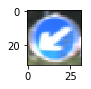

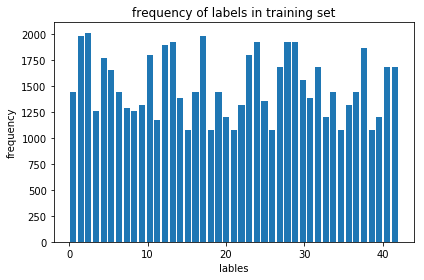

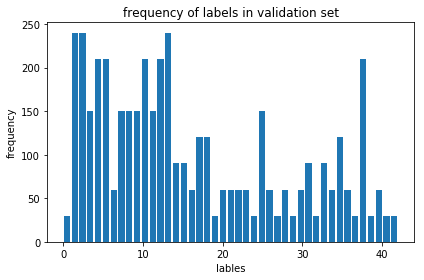

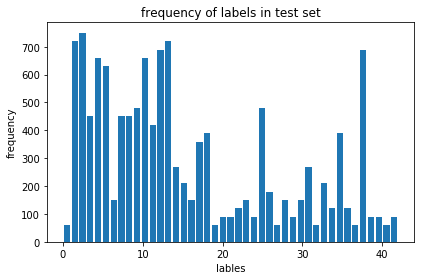

In [15]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Visualizations will be shown in the notebook.
%matplotlib inline


index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
''
plt.figure(figsize=(1,1))
plt.imshow(image)#, cmap="gray")
print(y_train[index])

#------

num_bins = 43
fig, ax = plt.subplots()
n, bins, patches = ax.hist(y_train, num_bins, rwidth = 0.8,normed=0)
ax.set_xlabel('lables')
ax.set_ylabel('frequency')
ax.set_title(r'frequency of labels in training set')
fig.tight_layout()
plt.show()

num_bins = 43
fig, ax = plt.subplots()
n, bins, patches = ax.hist(y_valid, num_bins,rwidth = 0.8, normed=0)
ax.set_xlabel('lables')
ax.set_ylabel('frequency')
ax.set_title(r'frequency of labels in validation set')
fig.tight_layout()
plt.show()

num_bins = 43
fig, ax = plt.subplots()
n, bins, patches = ax.hist(y_test, num_bins,rwidth = 0.8, normed=0)
ax.set_xlabel('lables')
ax.set_ylabel('frequency')
ax.set_title(r'frequency of labels in test set')
fig.tight_layout()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

12
(64468, 32, 32, 1)
28653


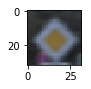

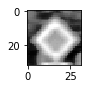

In [16]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
''
plt.figure(figsize=(1,1))
plt.imshow(image)#, cmap="gray")
print(y_train[index])

# convert to grey images
X_train_g = np.zeros((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_train_hg = np.zeros((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
for i in range(X_train.shape[0]):
    X_train_g[i,:,:,0]=cv2.cvtColor(X_train[i,:,:,:], cv2.COLOR_BGR2GRAY)
    X_train_hg[i,:,:,0]=cv2.equalizeHist(X_train_g[i,:,:,0] .astype(np.uint8))
X_train=X_train_hg.astype(np.float32)

X_valid_g = np.zeros((X_valid.shape[0],X_valid.shape[1],X_valid.shape[2],1))
X_valid_hg = np.zeros((X_valid.shape[0],X_valid.shape[1],X_valid.shape[2],1))
for i in range(X_valid.shape[0]):
    X_valid_g[i,:,:,0]=cv2.cvtColor(X_valid[i,:,:,:], cv2.COLOR_BGR2GRAY)   
    X_valid_hg[i,:,:,0]=cv2.equalizeHist(X_valid_g[i,:,:,0] .astype(np.uint8))
X_valid=X_valid_hg.astype(np.float32)
    
X_test_g = np.zeros((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
X_test_hg = np.zeros((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
for i in range(X_test.shape[0]):
    X_test_g[i,:,:,0]=cv2.cvtColor(X_test[i,:,:,:], cv2.COLOR_BGR2GRAY)
    X_test_hg[i,:,:,0]=cv2.equalizeHist(X_test_g[i,:,:,0] .astype(np.uint8))
X_test=X_test_hg.astype(np.float32)

#index = random.randint(0, len(X_train))
image_grey = X_train[index].squeeze()
''
plt.figure(figsize=(1,1))
plt.imshow(image_grey, cmap="gray")



# normalize approx
X_train=(X_train-128)/128
X_valid=(X_valid-128)/128
X_test=(X_test-128)/128

print(X_train.shape)

#shuffle
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

#setup TF
import tensorflow as tf

EPOCHS = 100   # to be overwritten later!
BATCH_SIZE = 256 #128 # 128
mylambda=0.25

print(index)

### Model Architecture

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

mu = 0.00
sigma = 0.1
    
weights = {
    'wc1': tf.Variable(tf.truncated_normal([5, 5, 1, 6], mean = mu, stddev = sigma)),#,name='wc1'),
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma)),
    'wd1': tf.Variable(tf.truncated_normal([400, 120], mean = mu, stddev = sigma)),  #5x5x16. Output = 400
    'wd2': tf.Variable(tf.truncated_normal([120, 84], mean = mu, stddev = sigma)),  #Input = 120. Output = 84.
    'wd3': tf.Variable(tf.truncated_normal([84, 43], mean = mu, stddev = sigma))
    } #Input = 84. Output = 10.

biases = {
        'bc1': tf.zeros(6),
        'bc2': tf.zeros(16),
        'bd1': tf.zeros(120),
        'bd2': tf.zeros(84),
        'bd3': tf.zeros(43)
      }

def LeNet(x):      # based on my implementation for the quizz in class
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
   
    
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    ac1 = tf.nn.conv2d(x, weights['wc1'], strides=[1, 1, 1, 1], padding='VALID')
    ac1 = tf.nn.bias_add(ac1, biases['bc1'])


    # TODO: Activation.
    ac1 = tf.nn.relu(ac1)
    # print('ac1 = ' + str(ac1.shape))
   
    #ac1 = tf.nn.dropout(ac1, keep_prob)


    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    ap1= tf.nn.max_pool(
        ac1,
        ksize=[1, 2, 2, 1],
        strides=[1, 2, 2, 1],
        padding='SAME')
    #print('ap1 = ' + str(ap1.shape))

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    ac2 = tf.nn.conv2d(ap1, weights['wc2'], strides=[1, 1, 1, 1], padding='VALID')
    ac2 = tf.nn.bias_add(ac2, biases['bc2'])

    
    # TODO: Activation.
    ac2 = tf.nn.relu(ac2)
    #print('ac2 = ' + str(ac2.shape))
    #ac2 = tf.nn.dropout(ac2, keep_prob)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
        
    ap2= tf.nn.max_pool(
        ac2,
        ksize=[1, 2, 2, 1],
        strides=[1, 2, 2, 1],
        padding='SAME')
    #print('ap2 = ' + str(ap2.shape))


    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc1 = tf.reshape(ap2, [-1, weights['wd1'].get_shape().as_list()[0]]) # could have used "flatten"
    #print('fc1 (after flatten) = ' + str(fc1.shape))
        
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob) #dropout parameter 
    #print('fc1 (final) = ' + str(fc1.shape))
    

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob) #dropout parameter 
    #print('fc2 = ' + str(fc2.shape))

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3 = tf.add(tf.matmul(fc2, weights['wd3']), biases['bd3'])
    #print('fc3 = ' + str(fc3.shape))
    
    logits=fc3
    
    return logits,ac1,ap1,ac2,ap2

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
print(tf.__version__)
#tf.contrib.image.translate not available in this version of TF
# i am not risking an update at the present state, that is a few days before submission 

1.3.0


In [19]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 1)) # xxx
batch_size = tf.shape(x)[0]
im_size=tf.shape(x)[1]
# apply random rotations "on the fly", i.e. on-line
anglevector=tf.random_normal(
    [batch_size],
    mean=0.0,
    stddev=3.0 *3.14/180) # +/- 3° noise
x=tf.contrib.image.rotate(x,anglevector) #rotate x by random vactors
# end of random rotations
# add random noise  "on the fly", i.e. on-line
noise=tf.random_normal(
    tf.shape(x),
    mean=0.0,
    stddev=0.1) # range of pixel values is approx [-1,1]
x=x+noise
# end of add random noise
### # the following is omitted due to TF v1.3 on my machine not supporting tf.contrib.image.translate
#### add random translations  "on the fly", i.e. on-line
###translations=tf.random_normal(
###    [batch_size,im_size,im_size],
###    mean=0.0,
###    stddev=3) # translate +/- 3 pixel-widths
###x=tf.contrib.image.translate(x,translations)
####translations: A vector representing [dx, dy] or (if images has rank 4) a matrix of length num_images,
####with a [dx, dy] vector for each image in the batch.
#### end of add translations




y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

rate = 0.002 #0.001 #0.003

logits,ac1,ap1,ac2,ap2 = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)  \
   + mylambda*tf.reduce_mean(tf.multiply(weights['wc1'],weights['wc1'])) \
   + mylambda*tf.reduce_mean(tf.multiply(weights['wc2'],weights['wc2']))  \
   + mylambda*tf.reduce_mean(tf.multiply(weights['wd1'],weights['wd1']))  \
   + mylambda*tf.reduce_mean(tf.multiply(weights['wd2'],weights['wd2']))  \
   + mylambda*tf.reduce_mean(tf.multiply(weights['wd3'],weights['wd3']))
    
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    #print(num_examples)
    total_accuracy = 0
    sess = tf.get_default_session()
    #saver.restore(sess, './lenet')
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [20]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 256 #128 # 128
mylambda=0.25
#saver = tf.train.Saver()


#tf.reset_default_graph()
#saver = tf.train.import_meta_graph('./lenet.meta')

In [32]:
if True:   # retrain only on demand
    train_err_hist=[]
    valid_err_hist=[]
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        #saver = tf.train.import_meta_graph('./lenet.meta')
        #saver.restore(sess, './lenet')
    
        #new_saver = tf.train.import_meta_graph('lenet.meta')
        #new_saver.restore(sess, tf.train.latest_checkpoint('./'))
        num_examples = len(X_train)
        num_valid_examples = len(X_valid)
    
        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                #print(offset)
                end = offset + BATCH_SIZE
                if 1: #end <= num_examples:    
                    batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                    sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.5}) 
            
            validation_accuracy =  evaluate(X_valid, y_valid)
            valid_err_hist.append(1-validation_accuracy)
            #evaluate(X_valid[:(num_valid_examples//BATCH_SIZE) *BATCH_SIZE- 1,:,:,:], y_valid[:(num_valid_examples//BATCH_SIZE) *BATCH_SIZE-1])
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
            training_accuracy =  evaluate(X_train, y_train)
            train_err_hist.append(1-training_accuracy)
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print()
            print()
        test_accuracy =  evaluate(X_test, y_test)
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print()
        print()
        
        saver.save(sess, './lenet')
        print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.786

Training Accuracy = 0.851


EPOCH 2 ...
Validation Accuracy = 0.889

Training Accuracy = 0.935


EPOCH 3 ...
Validation Accuracy = 0.899

Training Accuracy = 0.952


EPOCH 4 ...
Validation Accuracy = 0.914

Training Accuracy = 0.969


EPOCH 5 ...
Validation Accuracy = 0.927

Training Accuracy = 0.976


EPOCH 6 ...
Validation Accuracy = 0.938

Training Accuracy = 0.982


EPOCH 7 ...
Validation Accuracy = 0.940

Training Accuracy = 0.984


EPOCH 8 ...
Validation Accuracy = 0.946

Training Accuracy = 0.987


EPOCH 9 ...
Validation Accuracy = 0.945

Training Accuracy = 0.989


EPOCH 10 ...
Validation Accuracy = 0.945

Training Accuracy = 0.990


EPOCH 11 ...
Validation Accuracy = 0.946

Training Accuracy = 0.990


EPOCH 12 ...
Validation Accuracy = 0.949

Training Accuracy = 0.989


EPOCH 13 ...
Validation Accuracy = 0.951

Training Accuracy = 0.991


EPOCH 14 ...
Validation Accuracy = 0.956

Training Accuracy = 0.994


EPOCH 15 ...
Val

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

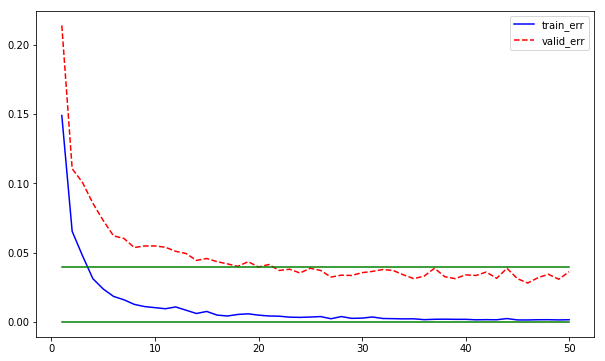

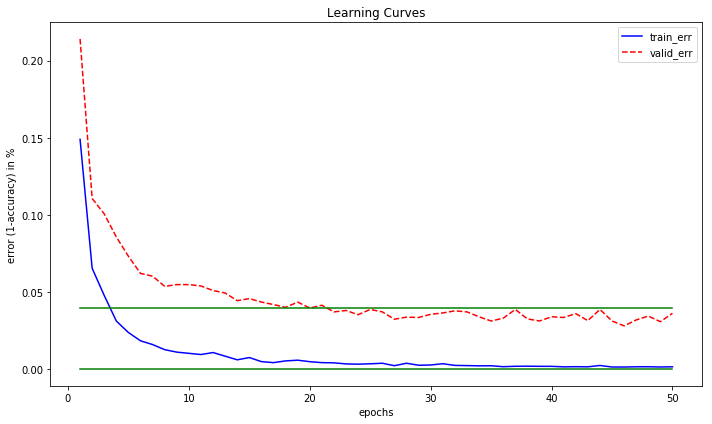

In [53]:
#print(train_acc_hist)
#plt.plot([train_acc_hist, valid_acc_hist])

t = np.linspace(1, EPOCHS)
zz= np.zeros(EPOCHS)
ff= zz+0.04
plt.figure(figsize=(10, 6))
line1, = plt.plot(t, train_err_hist, 'b-', label='train_err')
line2, = plt.plot(t, valid_err_hist, 'r--', label='valid_err')
line3, = plt.plot(t, zz, 'g' )
line4, = plt.plot(t, ff, 'g' )
plt.legend(loc='upper right')


fig, ax = plt.subplots(figsize=(10, 6))
line1, = plt.plot(t, train_err_hist, 'b-', label='train_err')
line2, = plt.plot(t, valid_err_hist, 'r--', label='valid_err')
line3, = plt.plot(t, zz, 'g' )
line4, = plt.plot(t, ff, 'g' )
ax.set_xlabel('epochs')
ax.set_ylabel('error (1-accuracy) in %')
ax.set_title('Learning Curves')
ax.legend(loc='upper right')
fig.tight_layout()
plt.show()

### Load and Output the Images

INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet

example of German traffic sign not in the list of 43 signs:

INFO:tensorflow:Restoring parameters from ./lenet
(array([[0.23, 0.2 , 0.15]], dtype=float32), array([[16,  8, 14]], dtype=int32))
[[ 0.45  0.19  0.15 23.   41.   38.    1.  ]
 [ 0.52  0.35  0.06 29.   35.   25.   38.  ]
 [ 0.99  0.    0.   14.   33.   34.   14.  ]
 [ 0.78  0.12  0.06 38.   14.   31.    4.  ]
 [ 0.96  0.02  0.    9.   13.   10.    9.  ]
 [ 1.    0.    0.   17.    9.   36.   17.  ]
 [ 1.    0.    0.   13.   35.   12.   13.  ]
 [ 1.    0.    0.   12.   40.   11.   12.  ]]
INFO:tensorflow:Restoring parameters from ./le

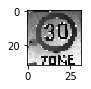

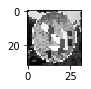

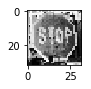

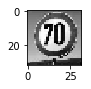

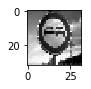

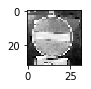

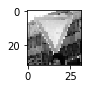

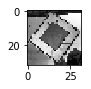

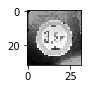

In [51]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

def preprocess(filepath):
    img = cv2.imread(filepath) #(('./verkehrszeichen/tempo30.jpg')
    #print(img.shape)
    #plt.figure(figsize=(1,1))
    #plt.imshow(img)

    img_small= cv2.resize(img, (32,32))
    
    #X_test_g = np.zeros((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
    #X_test_hg = np.zeros((X_test.shape[0],X_test.shape[1],X_test.shape[2]))
    #for i in range(X_test.shape[0]):
    #    X_test_g[i,:,:,0]=cv2.cvtColor(X_test[i,:,:,:], cv2.COLOR_BGR2GRAY)
    #    X_test_hg[i,:,:]=cv2.equalizeHist(X_test_g[i,:,:] .astype(np.uint8))
    #X_test=X_test_hg

    img_small_g = np.zeros((32,32,1))
    img_small_g[:,:,0]=cv2.cvtColor(img_small, cv2.COLOR_BGR2GRAY)
    
    img_small_hg = np.zeros((32,32,1))
    img_small_hg[:,:,0]=cv2.equalizeHist(img_small_g[:,:,0] .astype(np.uint8))
    

    img_small_hg= (img_small_hg.astype(np.float32) -128)/128
   

    plt.figure(figsize=(1,1))
    plt.imshow(img_small_hg[:,:,0], cmap="gray")
    return img_small_hg


def eval_leNet(img):
    import tensorflow as tf
    with tf.Session() as sess:
        #saver = tf.train.import_meta_graph('./lenet.meta')
        saver.restore(sess, './lenet')
        values,indices = sess.run(tf.nn.top_k(tf.nn.softmax(logits),3), feed_dict={x: [img],keep_prob: 1.0})
        training_accuracy =  evaluate(X_train, y_train)
        return values,indices

#--- define realworld images 
y_realworld=np.array([1,38,14,4,9,17,13,12])  # the true indices of the following images

mytable=np.zeros((y_realworld.shape[0], 7)) # table to store the softmax probs, the indices and true index
myindex=0

tempo30_scaled       = preprocess('./verkehrszeichen/tempo30.jpg')
values,indices = eval_leNet(tempo30_scaled)
mytable[myindex,0:3]=values
mytable[myindex,3:6]=indices
mytable[myindex,6]=y_realworld[myindex]
myindex=myindex+1

rechts_vorbei_scaled        = preprocess('./verkehrszeichen/rechts_vorbei.jpg')
values,indices =eval_leNet(rechts_vorbei_scaled)
mytable[myindex,0:3]=values
mytable[myindex,3:6]=indices
mytable[myindex,6]=y_realworld[myindex]
myindex=myindex+1

stop_scaled        = preprocess('./verkehrszeichen/stop.jpg')
values,indices =eval_leNet(stop_scaled)
mytable[myindex,0:3]=values
mytable[myindex,3:6]=indices
mytable[myindex,6]=y_realworld[myindex]
myindex=myindex+1

tempo70_scaled = preprocess('./verkehrszeichen/tempo70.jpg')
values,indices =eval_leNet(tempo70_scaled)
mytable[myindex,0:3]=values
mytable[myindex,3:6]=indices
mytable[myindex,6]=y_realworld[myindex]
myindex=myindex+1

ueberholverbot_scaled = preprocess('./verkehrszeichen/ueberholverbot.jpg')
values,indices =eval_leNet(ueberholverbot_scaled)
mytable[myindex,0:3]=values
mytable[myindex,3:6]=indices
mytable[myindex,6]=y_realworld[myindex]
myindex=myindex+1

einfahrt_verboten_scaled = preprocess('./verkehrszeichen/einfahrt_verboten.jpg')
values,indices =eval_leNet(einfahrt_verboten_scaled)
mytable[myindex,0:3]=values
mytable[myindex,3:6]=indices
mytable[myindex,6]=y_realworld[myindex]
myindex=myindex+1

vorfahrt_achten_scaled = preprocess('./verkehrszeichen/vorfahrt_achten.jpg')
values,indices =eval_leNet(vorfahrt_achten_scaled)
mytable[myindex,0:3]=values
mytable[myindex,3:6]=indices
mytable[myindex,6]=y_realworld[myindex]
myindex=myindex+1

vorfahrtstrasse_scaled = preprocess('./verkehrszeichen/vorfahrtstrasse.jpg')
values,indices =eval_leNet(vorfahrtstrasse_scaled)
mytable[myindex,0:3]=values
mytable[myindex,3:6]=indices
mytable[myindex,6]=y_realworld[myindex]
myindex=myindex+1
#----------
print()
print('example of German traffic sign not in the list of 43 signs:')
h3p5m_scaled = preprocess('./verkehrszeichen/3p5m.jpg')

print()
print(eval_leNet(h3p5m_scaled))
#---------

X_realworld=np.array([tempo30_scaled,
            rechts_vorbei_scaled,
            stop_scaled,
            tempo70_scaled,
            ueberholverbot_scaled,
            einfahrt_verboten_scaled,
            vorfahrt_achten_scaled,
            vorfahrtstrasse_scaled
            ])

#h3p5m_scaled = preprocess('./verkehrszeichen/3p5m.jpg')
#print(eval_leNet(h3p5m_scaled)) 


np.set_printoptions(precision=2,suppress = True)
print(mytable)

#print(X_realworld.shape)
#print(y_realworld.shape)

with tf.Session() as sess:
        #saver = tf.train.import_meta_graph('./lenet.meta')
        saver.restore(sess, './lenet')
        print()
        print('real world acc:'+str(evaluate(X_realworld,y_realworld)))



### Predict the Sign Type for Each Image

In [54]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

values.shape
mytable



array([[ 0.45,  0.19,  0.15, 23.  , 41.  , 38.  ,  1.  ],
       [ 0.52,  0.35,  0.06, 29.  , 35.  , 25.  , 38.  ],
       [ 0.99,  0.  ,  0.  , 14.  , 33.  , 34.  , 14.  ],
       [ 0.78,  0.12,  0.06, 38.  , 14.  , 31.  ,  4.  ],
       [ 0.96,  0.02,  0.  ,  9.  , 13.  , 10.  ,  9.  ],
       [ 1.  ,  0.  ,  0.  , 17.  ,  9.  , 36.  , 17.  ],
       [ 1.  ,  0.  ,  0.  , 13.  , 35.  , 12.  , 13.  ],
       [ 1.  ,  0.  ,  0.  , 12.  , 40.  , 11.  , 12.  ]])

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


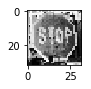

In [55]:
myimage= stop_scaled  #rechts_vorbei_scaled
plt.figure(figsize=(1,1))
plt.imshow(myimage[:,:,0], cmap="gray")

INFO:tensorflow:Restoring parameters from ./lenet


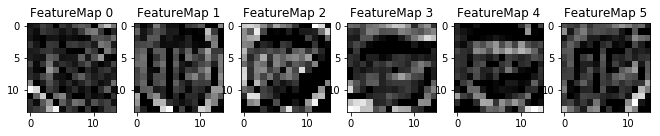

In [56]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : [image_input]})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

            
                    
            
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    outputFeatureMap(myimage,ap1)
 
    
            
